<h3 style="background-color: #111; padding: 15px; font: bold 30px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px ; text-align: center">
Titanic Classification Models 🚢</h3>


<img src="https://i2-prod.mirror.co.uk/incoming/article13465517.ece/ALTERNATES/s615b/0_Titanic-1997.jpg" alt="Alternative text" width="1200" height="600"/>


## **Problem Statement**

The goal of this notebook is to build a predictive model that predicts whether a passenger survived or not on the Titanic.


# **Data Dictionary**

 - https://www.kaggle.com/c/titanic/data

About Data: The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

 ---

## **Variable**	
survival	Survival	0 = No, 1 = Yes                                                                                     
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd                                                                               
sex	Sex	                                                                                                            
Age	Age in years	                                                                                                        
sibsp	                                                                                                                                        
parch		                                                                                                                
ticket	Ticket number	                                                                                                
fare	Passenger fare	                                                                                                                    
cabin	Cabin number	                                                                                                            
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton                                                      
Variable Notes                                                                                                          
pclass: A proxy for socio-economic status (SES)                                                                                     
1st = Upper                                                                                                             
2nd = Middle                                                                                                                        
3rd = Lower                                                                                                                         
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5                                                               
sibsp: The dataset defines family relations in this way...                                                                                      
Sibling = brother, sister, stepbrother, stepsister                                                                                              
Spouse = husband, wife (mistresses and fiancés were ignored)                                                                                      
parch: The dataset defines family relations in this way...                                                                                  
Parent = mother, father                                                                                                 
Child = daughter, son, stepdaughter, stepson                                                                                            
Some children travelled only with a nanny, therefore parch=0 for them.                              

import libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.calibration import LabelEncoder
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    f1_score,
)
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## **Data collection**
- load the data and get info about it

In [2]:
df=pd.read_csv('./DataSet/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
numerical_df=df.select_dtypes(include=['int64','float64'])
numerical_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## **Data Cleaning**
- handle missing data
- handle duplicates
- handle outliers
- handle categorical data
- handle imbalanced data
  

### **Missing Data**

In [8]:
def check_missing(df):
    if df.isnull().sum().sum() == 0:
        return 'No Missing Data'
    else: 
         total = df.isnull().sum().sort_values(ascending=False)
         percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
         missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data


import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

def auto_impute_missing(
    df: pd.DataFrame,
    add_missing_indicator: bool = False,
    drop_threshold: float = 0.5,
    random_state: int = 0,
    max_iter: int = 10
) ->(pd.DataFrame, pd.DataFrame):
    """
    Automatically imputes missing values based on column type, without using logging:
      - Numeric: Iterative Imputation (MICE)
      - Categorical: Mode imputation
      - Dates: Forward filling
      - Boolean: Mode imputation

    Also optionally drops columns with too many missing values,
    and can add missing‐value indicator flags.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame with missing values.
    add_missing_indicator : bool, default=False
        If True, adds a boolean column `<col>_missing` for each original col.
    drop_threshold : float, default=0.5
        Drop any column whose fraction of missing ≥ this threshold.
    random_state : int
        Random state for the IterativeImputer.
    max_iter : int
        Maximum iterations for the IterativeImputer.

    Returns
    -------
    df_imputed : pd.DataFrame
        DataFrame after dropping and imputing.
    missing_summary : pd.DataFrame
        Summary table showing total & percent missing per column
        before any operations.
    """
    df_imputed = df.copy()
    # 1) Compute missing-summary
    total_missing = df_imputed.isna().sum()
    pct_missing = total_missing / len(df_imputed)
    missing_summary = pd.DataFrame({
        'total': total_missing,
        'percent': pct_missing
    }).sort_values('percent', ascending=False)

    # If no missing at all, return immediately
    if missing_summary['total'].sum() == 0:
        print("No missing data detected.")
        return df_imputed, missing_summary

    print("Missing data summary:\n", missing_summary)

    # 2) Drop high-missing columns
    to_drop = missing_summary[missing_summary['percent'] >= drop_threshold].index.tolist()
    if to_drop:
        df_imputed.drop(columns=to_drop, inplace=True)
        print(f"Dropped columns (≥ {drop_threshold*100:.0f}% missing): {to_drop}")

    # 4) Identify types on the remaining columns
    num_cols = df_imputed.select_dtypes(include=np.number).columns
    cat_cols = df_imputed.select_dtypes(include=['object', 'category']).columns
    date_cols = df_imputed.select_dtypes(include=['datetime64[ns]', 'datetimetz']).columns
    bool_cols = df_imputed.select_dtypes(include='bool').columns

    # 5) Impute numeric via MICE
    if len(num_cols) > 0:
        imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)
        df_imputed[num_cols] = imputer.fit_transform(df_imputed[num_cols])
        print("Imputed numeric columns via IterativeImputer:", list(num_cols))

    # 6) Impute categoricals via mode
    for col in cat_cols:
        mode_series = df_imputed[col].mode(dropna=True)
        fill_val = mode_series.iloc[0] if not mode_series.empty else "Missing"
        df_imputed[col].fillna(fill_val, inplace=True)
    if len(cat_cols) > 0:
        print("Imputed categorical columns via mode:", list(cat_cols))

    # 7) Forward-fill date columns
    for col in date_cols:
        df_imputed[col].fillna(method='ffill', inplace=True)
    if len(date_cols) > 0:
        print("Forward-filled date columns:", list(date_cols))
    # 8) Impute booleans via mode
    for col in bool_cols:
        mode_series = df_imputed[col].mode(dropna=True)
        fill_val = bool(mode_series.iloc[0]) if not mode_series.empty else False
        df_imputed[col].fillna(fill_val, inplace=True)
    if len(bool_cols) > 0:
        print("Imputed boolean columns via mode:", list(bool_cols))

    return df_imputed, missing_summary


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
check_missing(df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [11]:
df_clean, miss = auto_impute_missing(df, drop_threshold=0.5, add_missing_indicator=True)

Missing data summary:
              total   percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
PassengerId      0  0.000000
Survived         0  0.000000
Pclass           0  0.000000
Name             0  0.000000
Sex              0  0.000000
SibSp            0  0.000000
Parch            0  0.000000
Ticket           0  0.000000
Fare             0  0.000000
Dropped columns (≥ 50% missing): ['Cabin']
Imputed numeric columns via IterativeImputer: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Imputed categorical columns via mode: ['Name', 'Sex', 'Ticket', 'Embarked']


C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\68965190.py:92: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(fill_val, inplace=True)


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(7), object(4)
memory usage: 76.7+ KB


In [13]:
check_missing(df_clean)

'No Missing Data'

### **Duplicate Data**

In [14]:
def check_duplicate(df):
    print(f'Number of duplicates: {df.duplicated().sum()}',df.duplicated().sum())
    per = df.duplicated().sum() / len(df)
    print(f'Percentage of duplicates: {per}')
    if df.duplicated().sum() > 0:
        print(df[df.duplicated()])
        print('dropped the duplicates')
    else:
        print("No duplicates")

In [15]:
check_duplicate(df_clean)

Number of duplicates: 0 0
Percentage of duplicates: 0.0
No duplicates


### **Outliers**

In [16]:
def show_outliers_all_columns(df, show_summary: bool = True):
    """
    Displays professional boxplots for all numerical columns in the DataFrame.
    Outliers are visually highlighted and counted.
    
    Parameters:
    - df: pd.DataFrame
    - show_summary: bool, whether to print the outlier summary (default: True)
    
    Returns:
    - pd.DataFrame: Summary of outliers for each column
    """
    numeric_cols = df.select_dtypes(include=['number']).columns

    if len(numeric_cols) == 0:
        print("No numeric columns found.")
        return pd.DataFrame()
    sns.set(style="whitegrid")
    outlier_info = []
    for col in numeric_cols:
        col_data = df[col].dropna()
        if col_data.empty:
            continue
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
        count = len(outliers)
        pct = count / len(col_data) if len(col_data) > 0 else 0
        outlier_info.append({
            'column': col,
            'outlier_count': count,
            'outlier_percent': pct,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        })
        plt.figure(figsize=(10, 2.5))
        ax = sns.boxplot(x=col_data, color="#2E86AB", width=0.6, fliersize=5)
        ax.set_title(f"Boxplot of {col}", fontsize=14, weight='bold')
        ax.set_xlabel(col, fontsize=12)
        for outlier in outliers:
            ax.text(outlier, 0, f"{round(outlier, 2)}", 
                    verticalalignment='center', fontsize=8, color='red')
        
        sns.despine(left=True)
        plt.tight_layout()
        plt.show()
    outlier_summary = pd.DataFrame(outlier_info)
    if not outlier_summary.empty:
        outlier_summary = outlier_summary.sort_values('outlier_percent', ascending=False)
    if show_summary and not outlier_summary.empty:
        print("Outlier Summary (count and %):")
        for _, row in outlier_summary.iterrows():
            print(f"- {row['column']}: {row['outlier_count']} outliers ({row['outlier_percent']:.2%})")
    
    return outlier_summary

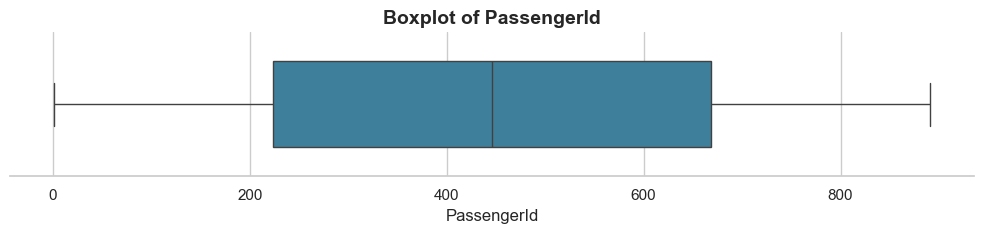

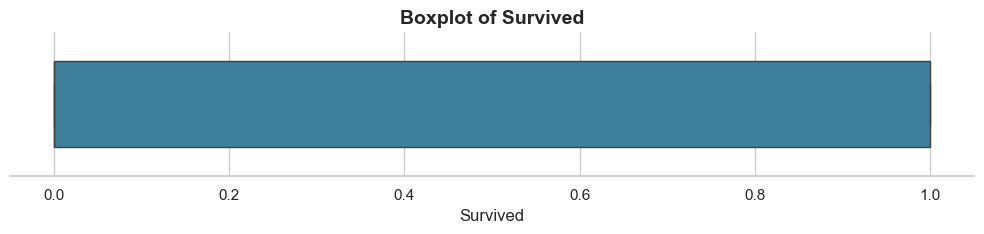

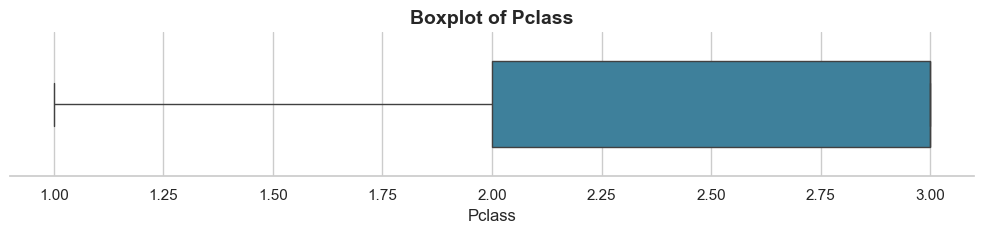

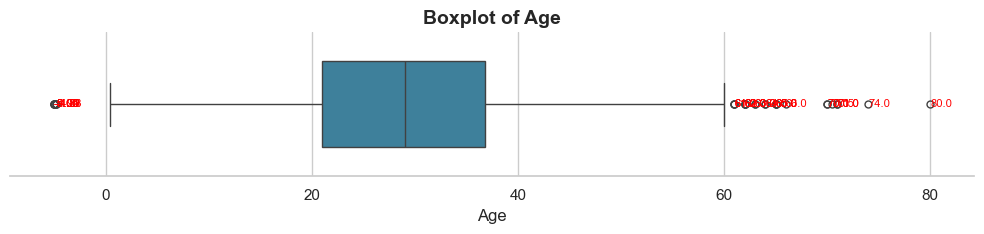

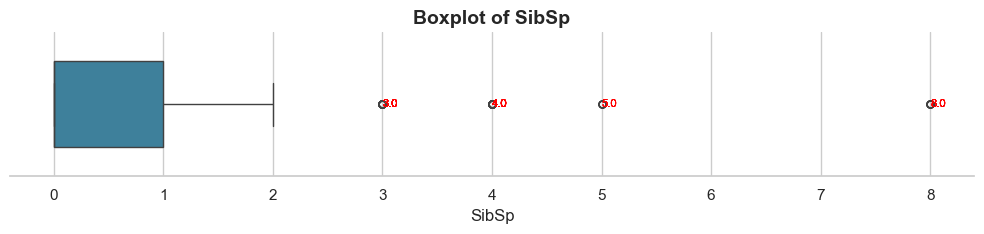

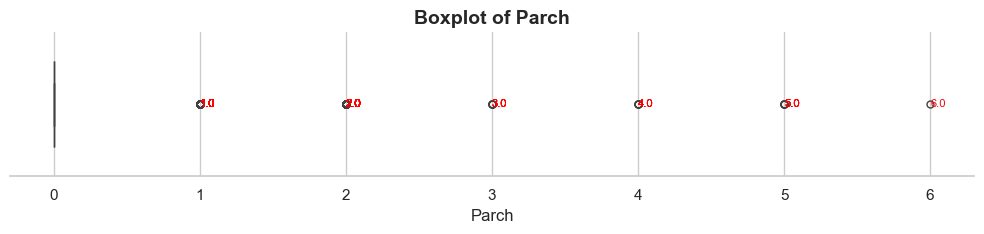

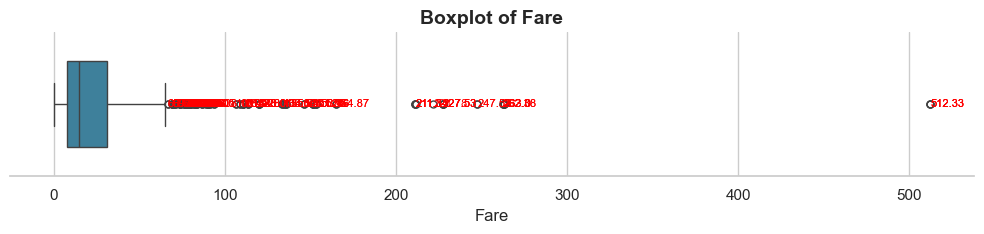

Outlier Summary (count and %):
- Parch: 213 outliers (23.91%)
- Fare: 116 outliers (13.02%)
- SibSp: 46 outliers (5.16%)
- Age: 29 outliers (3.25%)
- PassengerId: 0 outliers (0.00%)
- Survived: 0 outliers (0.00%)
- Pclass: 0 outliers (0.00%)


In [17]:
outliesr=show_outliers_all_columns(df_clean)

In [18]:
df_clean['Fare_log'] = np.log1p(df_clean['Fare'])
upper_bound_log = np.log1p(66.9063)
print(f"Upper Bound (Log Scale): {upper_bound_log}")
lower_bound_log = np.log1p(2)
print(f"Lower Bound (Log Scale): {lower_bound_log}")

Upper Bound (Log Scale): 4.218128813765682
Lower Bound (Log Scale): 1.0986122886681098


In [19]:

lower_extreme = 2  
upper_extreme = 5  
df_clean_filtered = df_clean[(df_clean['Fare_log'] > lower_extreme) & (df_clean['Fare_log'] < upper_extreme)]

In [20]:
removed_rows = df_clean.shape[0] - df_clean_filtered.shape[0]
print(f"Number of rows removed: {removed_rows}")
df_clean_filtered['Fare_bin'] = pd.qcut(df_clean_filtered['Fare_log'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
df_clean_filtered['Fare'].fillna(df_clean_filtered['Fare'].median(), inplace=True)
df_clean_filtered['Fare_log'].fillna(df_clean_filtered['Fare_log'].median(), inplace=True)
    

Number of rows removed: 47


C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\1692980953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_filtered['Fare_bin'] = pd.qcut(df_clean_filtered['Fare_log'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\1692980953.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to p

In [21]:
Q1 = df_clean_filtered['Age'].quantile(0.25)
Q3 = df_clean_filtered['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_age = Q1 - 1.5 * IQR
df_cleaned = df_clean_filtered[df_clean_filtered['Age'] >= lower_bound_age]
    
print(f"Removed {len(df_clean_filtered) - len(df_cleaned)} lower outliers from 'age' column.")

Removed 7 lower outliers from 'age' column.


In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  837 non-null    float64 
 1   Survived     837 non-null    float64 
 2   Pclass       837 non-null    float64 
 3   Name         837 non-null    object  
 4   Sex          837 non-null    object  
 5   Age          837 non-null    float64 
 6   SibSp        837 non-null    float64 
 7   Parch        837 non-null    float64 
 8   Ticket       837 non-null    object  
 9   Fare         837 non-null    float64 
 10  Embarked     837 non-null    object  
 11  Fare_log     837 non-null    float64 
 12  Fare_bin     837 non-null    category
dtypes: category(1), float64(8), object(4)
memory usage: 86.0+ KB


### **Data types**

In [23]:
df_cleaned['Embarked'].value_counts()

Embarked
S    605
C    155
Q     77
Name: count, dtype: int64

In [24]:
categorical_df=df_cleaned.select_dtypes(include=['object'])
for col in categorical_df.columns:
    df_cleaned[col] = df_cleaned[col].astype('category') 

C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\1623129072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\1623129072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\1623129072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  837 non-null    float64 
 1   Survived     837 non-null    float64 
 2   Pclass       837 non-null    float64 
 3   Name         837 non-null    category
 4   Sex          837 non-null    category
 5   Age          837 non-null    float64 
 6   SibSp        837 non-null    float64 
 7   Parch        837 non-null    float64 
 8   Ticket       837 non-null    category
 9   Fare         837 non-null    float64 
 10  Embarked     837 non-null    category
 11  Fare_log     837 non-null    float64 
 12  Fare_bin     837 non-null    category
dtypes: category(5), float64(8)
memory usage: 125.1 KB


### save data cleaning 

In [26]:
df_cleaned.drop(columns=['PassengerId'],  inplace=True)
df_cleaned.drop(columns=['Fare'],  inplace=True)
df_cleaned.drop(columns=['Name'],  inplace=True)
df_cleaned.drop(columns=['Ticket'],  inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\1247302050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['PassengerId'],  inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\1247302050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['Fare'],  inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\1247302050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
df_cleaned = df_cleaned.rename(columns={'Fare_log': 'Fare'})  


In [28]:
df_cleaned.to_csv('./DataSet/df_cleaned.csv', index=False)

## **Exploratory Data Analysis(EDA)**

### correlation 

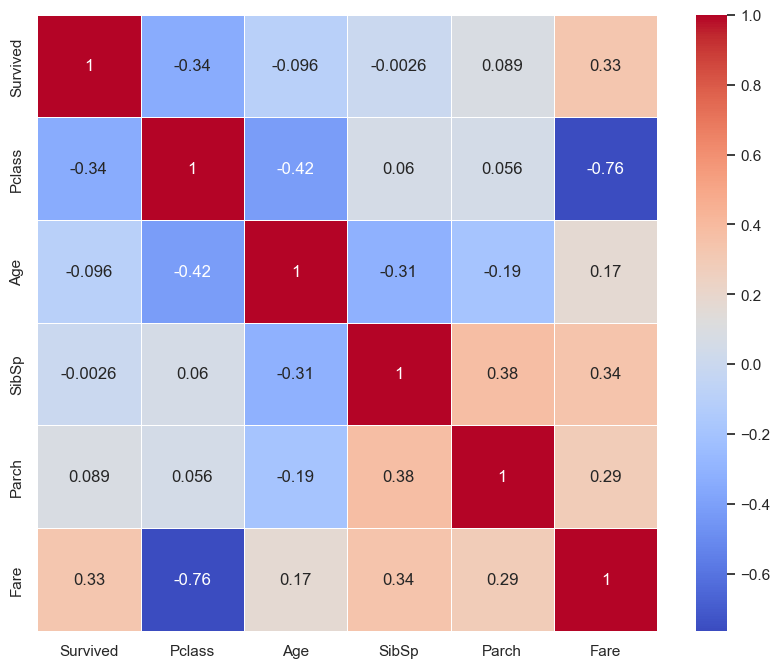

In [29]:
numerical_df=df_cleaned.select_dtypes(include=['int64','float64'])
cm = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [30]:
threshold = 0.3
strong_corr = cm[(cm > threshold) & (cm < 1.0)]
print(strong_corr.dropna(how='all').dropna(axis=1, how='all'))


          Survived     SibSp     Parch      Fare
Survived       NaN       NaN       NaN  0.327372
SibSp          NaN       NaN  0.379229  0.343766
Parch          NaN  0.379229       NaN       NaN
Fare      0.327372  0.343766       NaN       NaN


### Pair plot

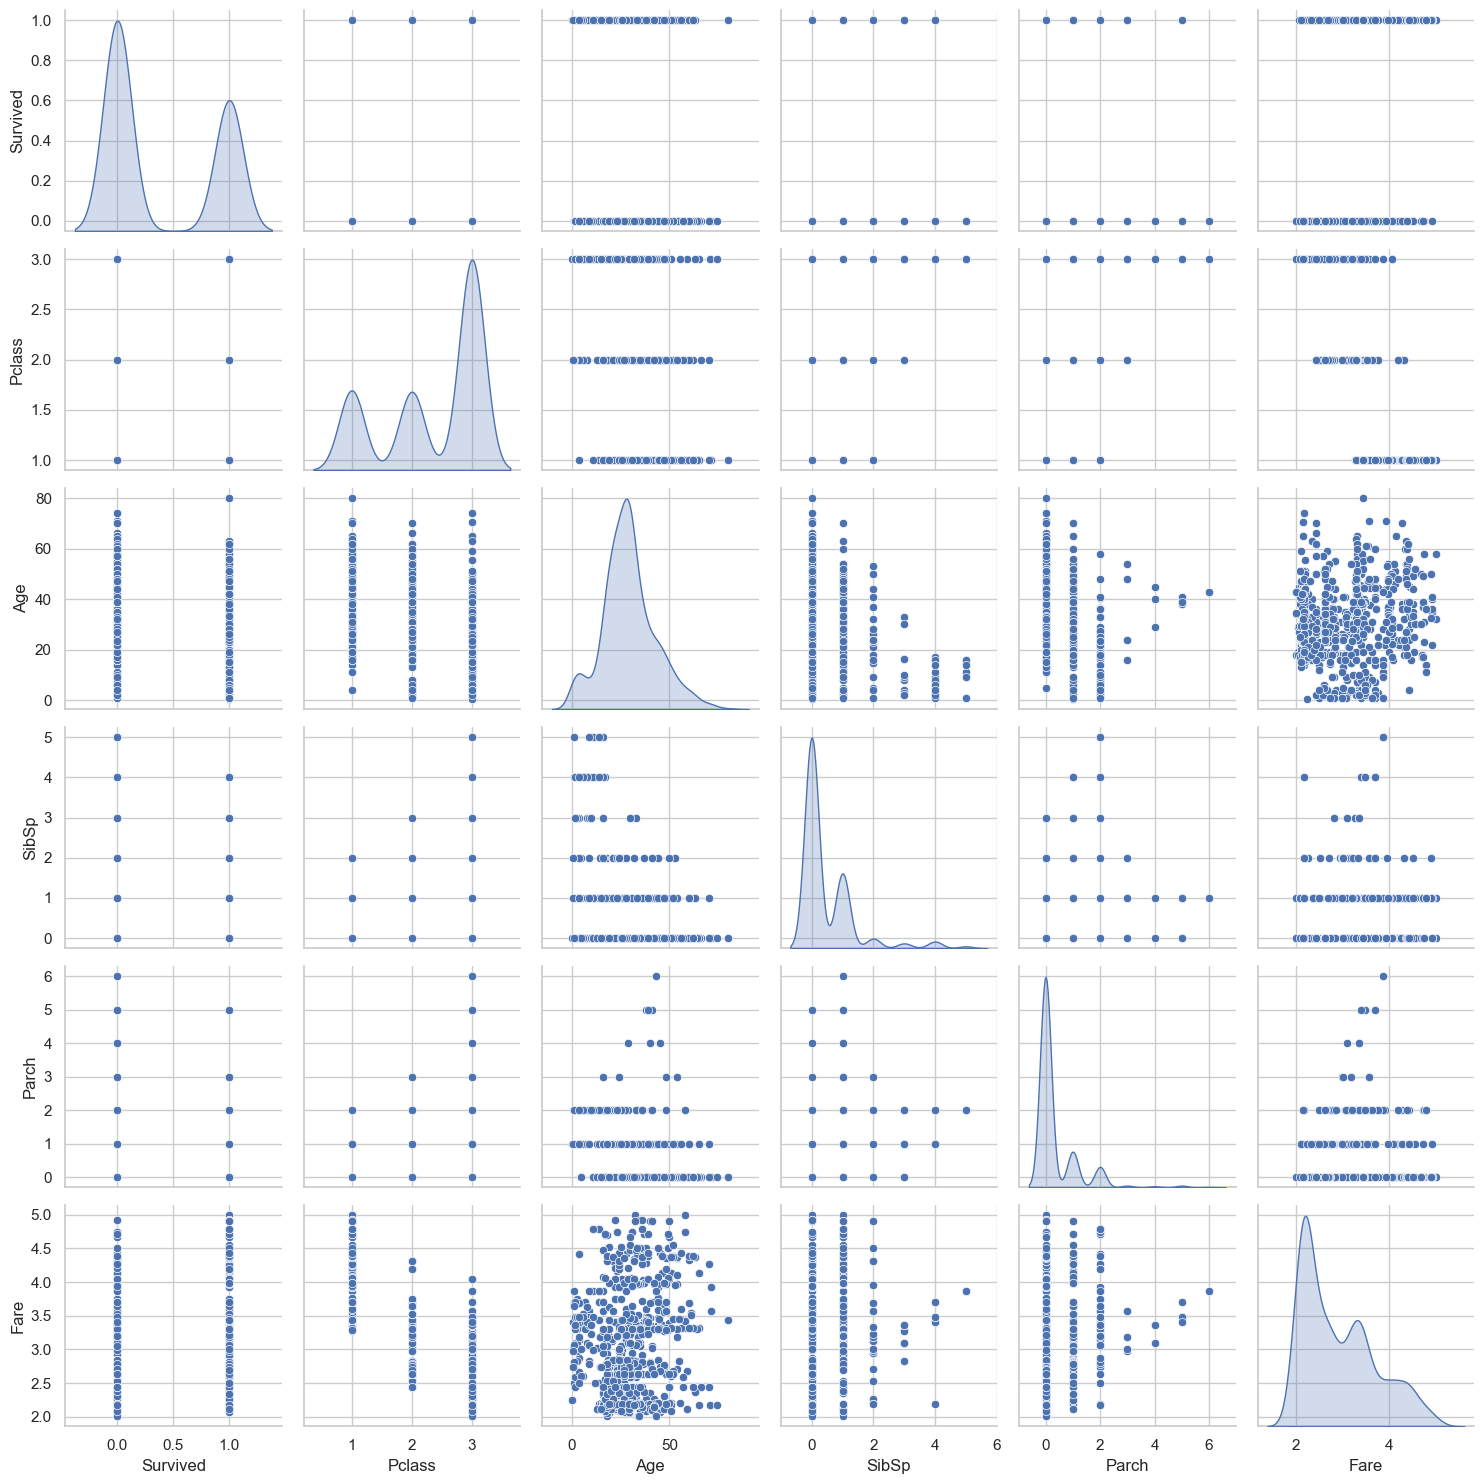

In [31]:
sns.pairplot(df_cleaned, diag_kind='kde')
plt.tight_layout()
plt.savefig('Images/pairplot.png')
plt.show()


### scatter plot

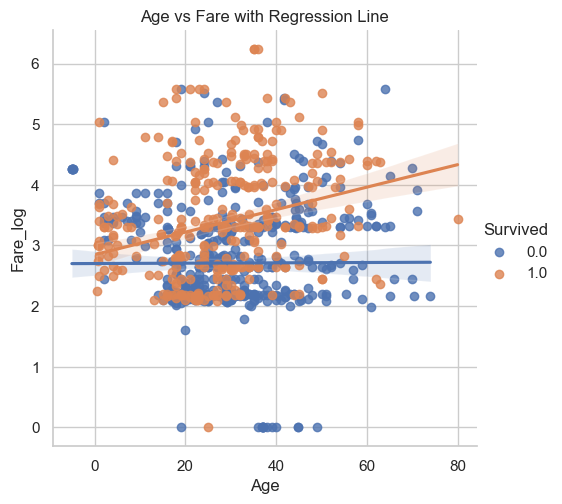

In [32]:
sns.lmplot(x='Age', y='Fare_log', hue='Survived', data=df_clean)
plt.title('Age vs Fare with Regression Line')
plt.savefig('Images/lmplot.png')
plt.show()


### Correlation with target

In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  837 non-null    float64 
 1   Pclass    837 non-null    float64 
 2   Sex       837 non-null    category
 3   Age       837 non-null    float64 
 4   SibSp     837 non-null    float64 
 5   Parch     837 non-null    float64 
 6   Embarked  837 non-null    category
 7   Fare      837 non-null    float64 
 8   Fare_bin  837 non-null    category
dtypes: category(3), float64(6)
memory usage: 48.7 KB


In [34]:
numerical_df = df_cleaned[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']]
target_corr = numerical_df.corr()['Survived'].sort_values(ascending=False)
print(target_corr)

Survived    1.000000
Fare        0.327372
Parch       0.088678
SibSp      -0.002649
Age        -0.095589
Name: Survived, dtype: float64


### show analysis 

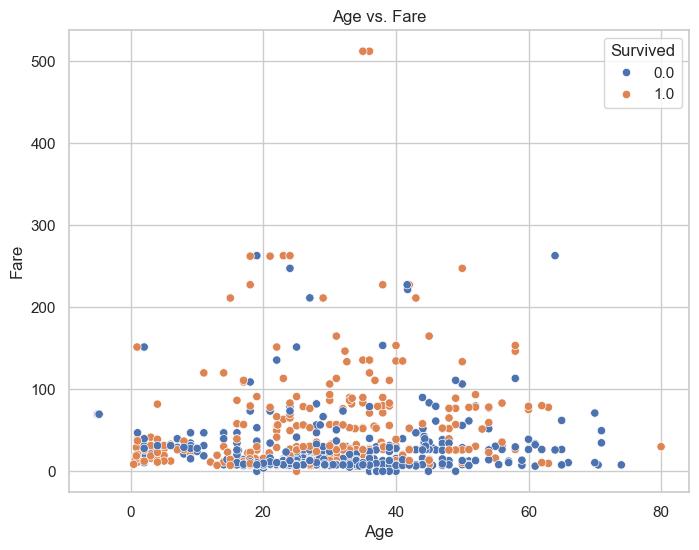

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clean['Age'], y=df_clean['Fare'], hue=df_clean['Survived'])
plt.title('Age vs. Fare')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\553171108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df_cleaned.groupby(age_groups)['Survived'].mean()


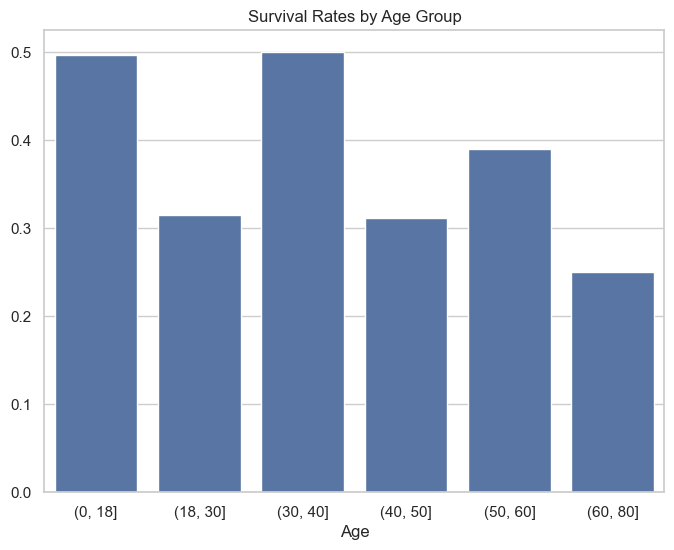

In [36]:
age_groups = pd.cut(df_cleaned['Age'], bins=[0, 18, 30, 40, 50, 60, 80])
survival_rates = df_cleaned.groupby(age_groups)['Survived'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title('Survival Rates by Age Group')
plt.savefig('Images/survival_rate_byAge.png')
plt.show()

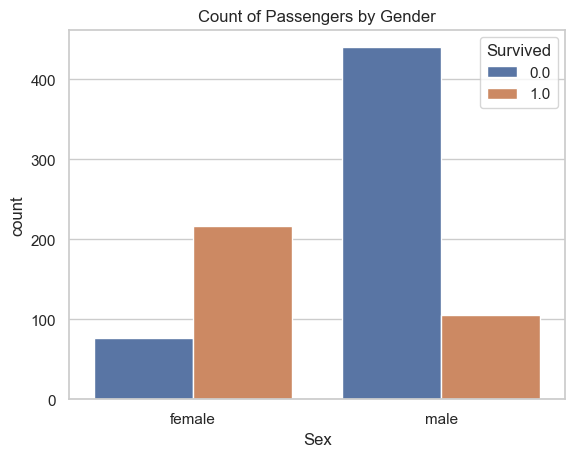

In [37]:
sns.countplot(x='Sex', data=df_cleaned, hue='Survived')
plt.title('Count of Passengers by Gender')
plt.savefig('Images/countplot_gender.png')
plt.show()

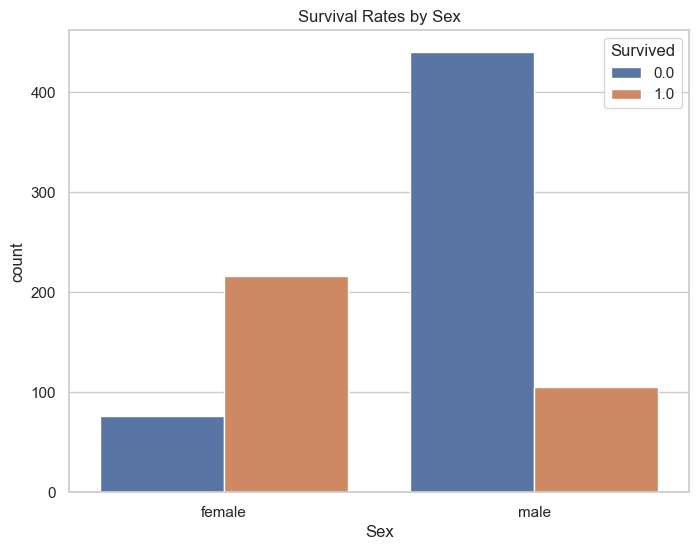

In [38]:
# Bar plot of survival rates by sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df_cleaned)
plt.title('Survival Rates by Sex')
plt.savefig('Images/survival_rate_bySex.png')
plt.show()

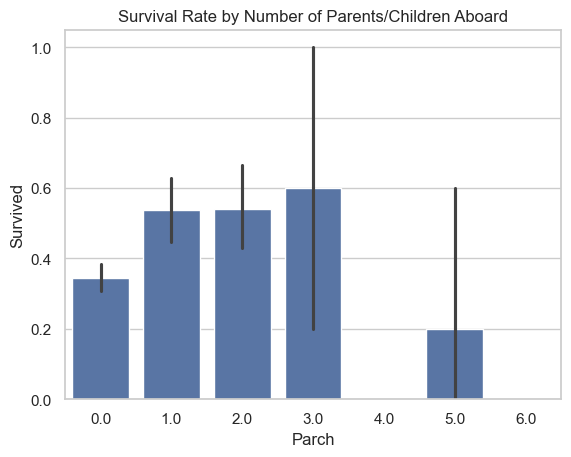

In [39]:
sns.barplot(x='Parch', y='Survived', data=df_cleaned)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.savefig('Images/survival_rate.png')
plt.show()

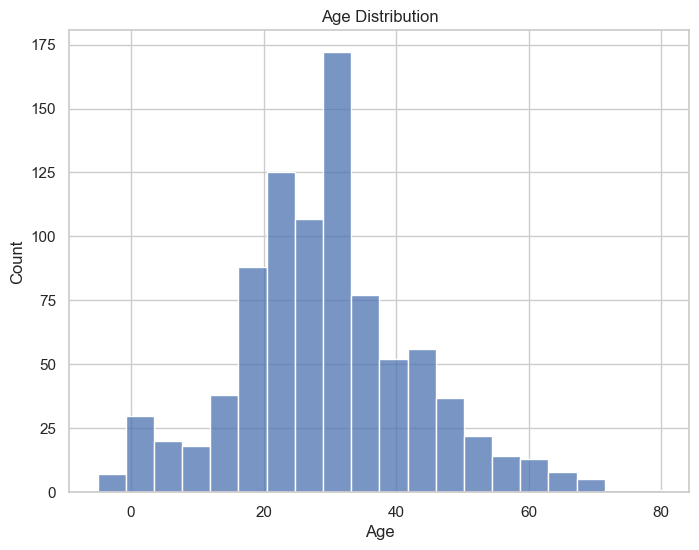

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['Age'], bins=20)
plt.title('Age Distribution')
plt.savefig('Images/histplot.png')
plt.show()

In [41]:
embarkation_points = df_cleaned['Embarked'].unique()
survival_rates_embark = df_cleaned.groupby('Embarked')['Survived'].mean()
print(survival_rates_embark)

Embarked
C    0.541935
Q    0.389610
S    0.342149
Name: Survived, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\3970154293.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates_embark = df_cleaned.groupby('Embarked')['Survived'].mean()


C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\4230123887.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=survival_rates_embark.index, y=survival_rates_embark.values, ci=None)


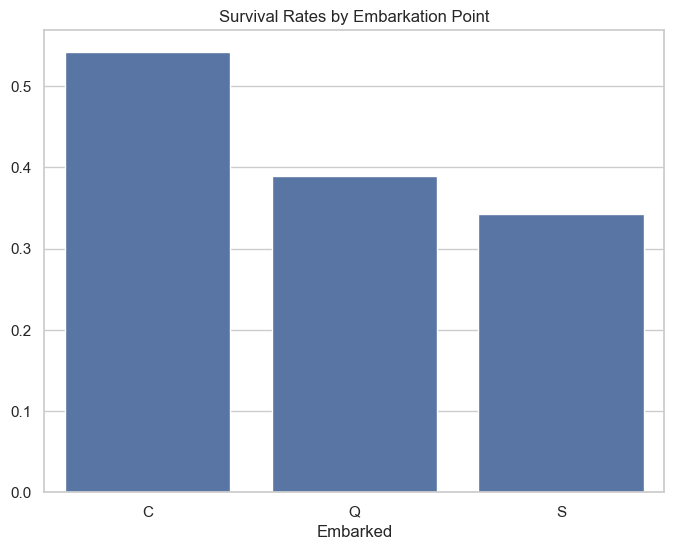

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates_embark.index, y=survival_rates_embark.values, ci=None)
plt.title('Survival Rates by Embarkation Point')
plt.savefig('Images/barplot.png')
plt.show()

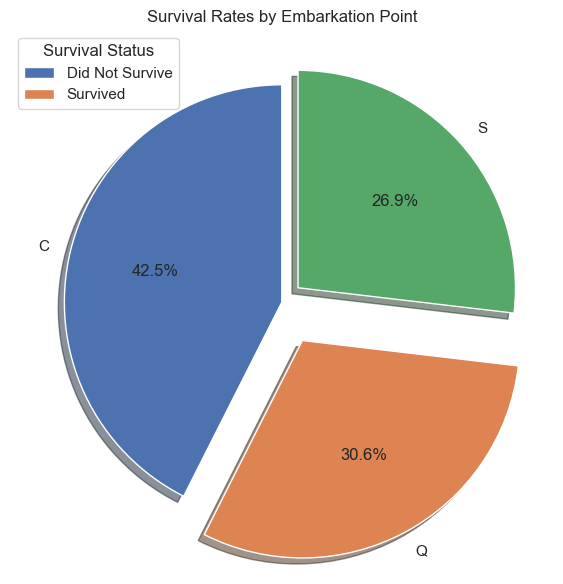

In [43]:
plt.figure(figsize=(8, 6))
plt.pie(survival_rates_embark.values, labels=survival_rates_embark.index, autopct='%1.1f%%', startangle=90 , shadow=True , explode=(0, 0.2, 0.1)) 
plt.title('Survival Rates by Embarkation Point')
plt.legend(title='Survival Status', labels=['Did Not Survive', 'Survived'])
plt.tight_layout()
plt.savefig('Images/piechart.png')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16660\1765146006.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


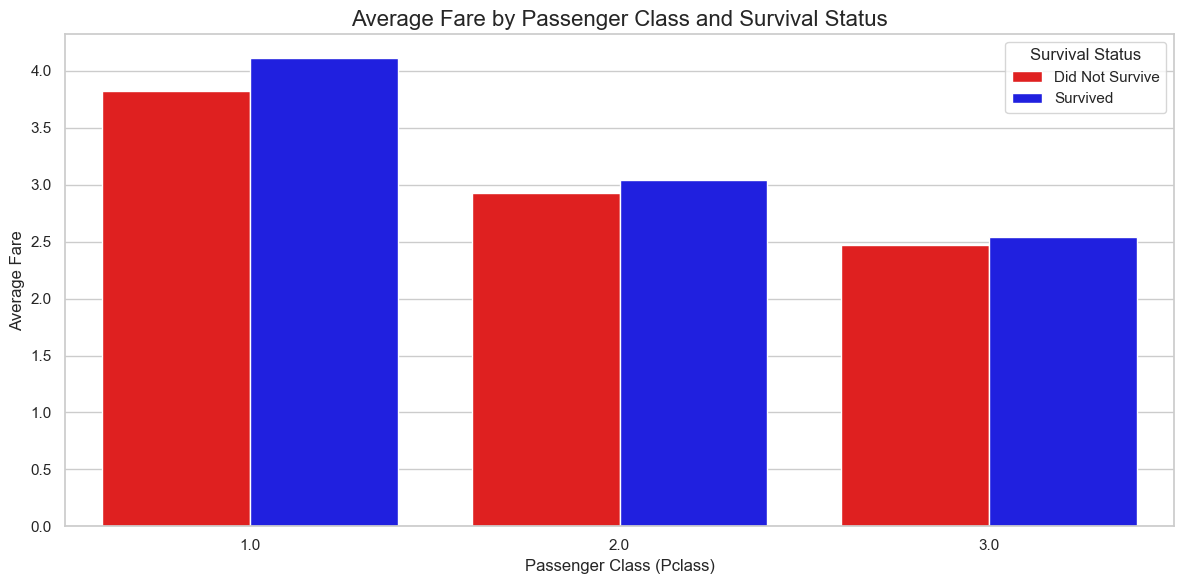

In [44]:

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_cleaned,
    x="Pclass", 
    y="Fare",   
    hue="Survived",  
    palette={0: "red", 1: "blue"},
    ci=None 
)
plt.title("Average Fare by Passenger Class and Survival Status", fontsize=16)
plt.xlabel("Passenger Class (Pclass)", fontsize=12)
plt.ylabel("Average Fare", fontsize=12)
plt.legend(title="Survival Status", labels=["Did Not Survive", "Survived"])
plt.tight_layout()
plt.savefig('Images/barplot.png')
plt.show()



## **Feature Engineering**

### create new features

In [45]:
df_cleaned['FamilySize'] = df_cleaned['SibSp'] + df_cleaned['Parch'] +1

In [46]:
df_cleaned['IsAlone'] = (df_cleaned['SibSp'] + df_cleaned['Parch'] == 0).astype(int)


In [47]:
df_cleaned['FarePerPerson'] = df_cleaned['Fare'] / df_cleaned['FamilySize']


In [48]:

df_cleaned['Is_UpperClass'] =df_cleaned ['Pclass'].apply(lambda x: 1 if x == 1 else 0)
df_cleaned['Is_LowerClass'] =df_cleaned ['Pclass'].apply(lambda x: 1 if x == 3 else 0)
df_cleaned['Is_MiddleClass']=df_cleaned['Pclass'].apply(lambda x: 1 if x == 2 else 0)

### Encoding

In [49]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        837 non-null    float64 
 1   Pclass          837 non-null    float64 
 2   Sex             837 non-null    category
 3   Age             837 non-null    float64 
 4   SibSp           837 non-null    float64 
 5   Parch           837 non-null    float64 
 6   Embarked        837 non-null    category
 7   Fare            837 non-null    float64 
 8   Fare_bin        837 non-null    category
 9   FamilySize      837 non-null    float64 
 10  IsAlone         837 non-null    int32   
 11  FarePerPerson   837 non-null    float64 
 12  Is_UpperClass   837 non-null    int64   
 13  Is_LowerClass   837 non-null    int64   
 14  Is_MiddleClass  837 non-null    int64   
dtypes: category(3), float64(8), int32(1), int64(3)
memory usage: 84.6 KB


In [50]:
label = LabelEncoder()
df_cleaned['Sex'] = label.fit_transform(df_cleaned['Sex'])
df_cleaned['Embarked'] = label.fit_transform(df_cleaned['Embarked'])
df_cleaned['Fare_bin'] = label.fit_transform(df_cleaned['Fare_bin'])
joblib.dump(label, 'assist/label_encoder.pkl')    

['assist/label_encoder.pkl']

In [51]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        837 non-null    float64
 1   Pclass          837 non-null    float64
 2   Sex             837 non-null    int32  
 3   Age             837 non-null    float64
 4   SibSp           837 non-null    float64
 5   Parch           837 non-null    float64
 6   Embarked        837 non-null    int32  
 7   Fare            837 non-null    float64
 8   Fare_bin        837 non-null    int32  
 9   FamilySize      837 non-null    float64
 10  IsAlone         837 non-null    int32  
 11  FarePerPerson   837 non-null    float64
 12  Is_UpperClass   837 non-null    int64  
 13  Is_LowerClass   837 non-null    int64  
 14  Is_MiddleClass  837 non-null    int64  
dtypes: float64(8), int32(4), int64(3)
memory usage: 91.5 KB


In [52]:
df_cleaned.to_csv('DataSet/datapreprocessed.csv', index=False)

## **Modeling**

In [ ]:
df_fs = df_cleaned.drop(['Is_MiddleClass', 'Fare'], axis=1)

X = df_fs.drop('Survived', axis=1)
y = df_fs['Survived']

### **split data into train and test**

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### **Model Selection and Training**

#### Random Forest

In [97]:
rf_model  = RandomForestClassifier(n_estimators=200,min_samples_split=10,bootstrap= True,class_weight='balanced_subsample', criterion="log_loss" ,max_features="log2",random_state=42,n_jobs=-1)

print('start predictions & fitting Random Forest Classifier ....')

rf_model.fit(X_train, y_train)
y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)


print('end predictions & fitting Random Forest Classifier ....')

start predictions & fitting Random Forest Classifier ....
end predictions & fitting Random Forest Classifier ....


#### XGBoost

In [98]:
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    subsample=0.6,
    reg_lambda=1,
    n_estimators=100,
    max_depth=3
)

print('start predictions & fitting XGB ....')

xgb.fit(X_train, y_train)
y_pred_xgb_test = xgb.predict(X_test)
y_pred_xgb_train = xgb.predict(X_train)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

print('end predictions & fitting XGB ....')


start predictions & fitting XGB ....


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:24:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


end predictions & fitting XGB ....


#### Support Vector Machine

In [99]:
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42 , C=0.1 ,gamma='scale' ))
])

print('start predictions & fitting SVC ....')

pipe_svc.fit(X_train, y_train)

y_pred_svc_test = pipe_svc.predict(X_test)
y_pred_svc_train = pipe_svc.predict(X_train)
y_proba_svc = pipe_svc.predict_proba(X_test)[:,1]


print('end predictions & fitting SVC ....')

start predictions & fitting SVC ....
end predictions & fitting SVC ....


#### KNeighborsClassifier

In [100]:

KNN=KNeighborsClassifier(algorithm="auto",leaf_size=10,n_neighbors=9,weights="uniform", p=2, metric='minkowski')
print('start predictions & fitting KNN ....')

KNN.fit(X_train, y_train)
y_pred_KNN_test = KNN.predict(X_test)
y_pred_KNN_train = KNN.predict(X_train)
y_proba_KNN = KNN.predict_proba(X_test)[:,1]

print('end predictions & fitting KNN ....')

start predictions & fitting KNN ....
end predictions & fitting KNN ....


### **Model Evaluation**

#### Random Forest

In [113]:
print(confusion_matrix(y_test, y_pred_rf_test))
print(classification_report(y_test, y_pred_rf_test))

[[92 12]
 [20 44]]
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       104
         1.0       0.79      0.69      0.73        64

    accuracy                           0.81       168
   macro avg       0.80      0.79      0.79       168
weighted avg       0.81      0.81      0.81       168



In [114]:

print("Train Accuracy:", accuracy_score(y_train, y_pred_rf_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf_test))
f1 = f1_score(y_test, y_pred_rf_test, average='binary')
print(f"F1 Score: {f1*100:.2f}%")

Train Accuracy: 0.9118086696562033
Test Accuracy: 0.8095238095238095
F1 Score: 73.33%


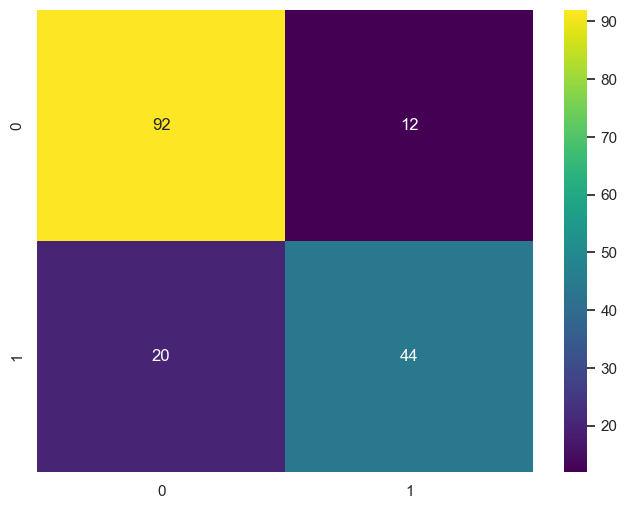

In [115]:
cm_rf=confusion_matrix(y_test, y_pred_rf_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf,annot=True,cmap="viridis")
plt.show() 

#### XGBoost

In [104]:

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_test))


Confusion Matrix:
 [[94 10]
 [17 47]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       104
         1.0       0.82      0.73      0.78        64

    accuracy                           0.84       168
   macro avg       0.84      0.82      0.83       168
weighted avg       0.84      0.84      0.84       168



In [105]:
print("ROC AUC :", roc_auc_score(y_test, y_proba_xgb))
print("Accuracy test:", accuracy_score(y_test, y_pred_xgb_test))
print("Accuracy train:", accuracy_score(y_train, y_pred_xgb_train))


ROC AUC : 0.8771033653846153
Accuracy test: 0.8392857142857143
Accuracy train: 0.9387144992526159


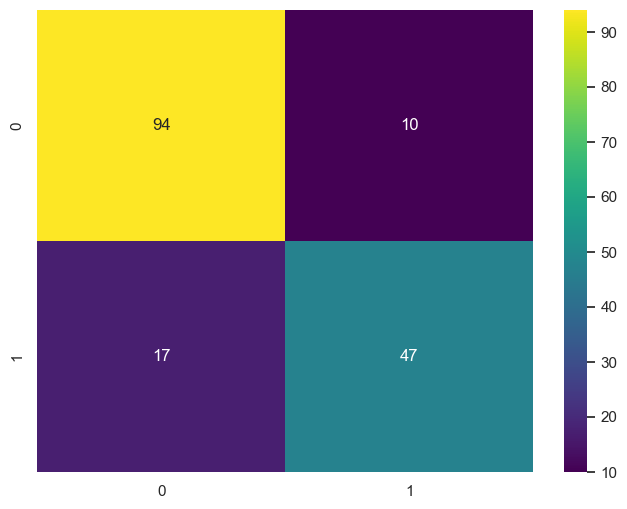

In [106]:
cm_xgb=confusion_matrix(y_test, y_pred_xgb_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb,annot=True,cmap="viridis")
plt.show()

#### Support Vector Machine


In [107]:

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc_test))


Confusion Matrix:
 [[92 12]
 [20 44]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       104
         1.0       0.79      0.69      0.73        64

    accuracy                           0.81       168
   macro avg       0.80      0.79      0.79       168
weighted avg       0.81      0.81      0.81       168



In [108]:
print("Test ROC AUC  :", roc_auc_score(y_test, y_proba_svc))
print("Accuracy test:", accuracy_score(y_test, y_pred_svc_test))


Test ROC AUC  : 0.8345853365384616
Accuracy test: 0.8095238095238095


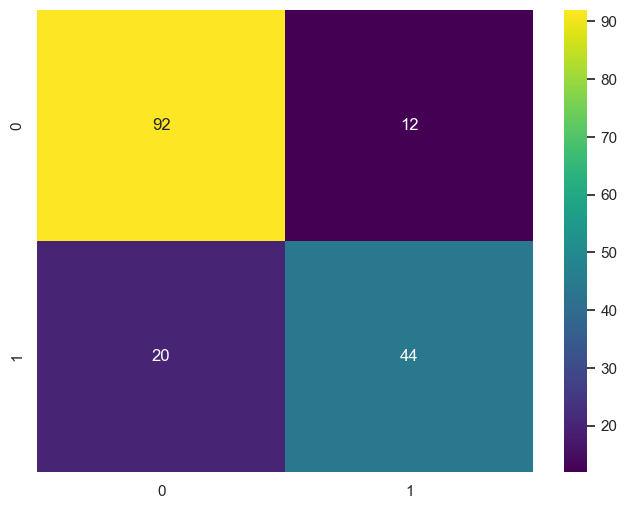

In [109]:
cm_svc=confusion_matrix(y_test, y_pred_svc_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc,annot=True,cmap="viridis")
plt.show()

#### KNeighborsClassifier

In [110]:
print("Classification Report for the test group : \n")
print(classification_report(y_test,y_pred_KNN_test),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(y_train,y_pred_KNN_train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       104
         1.0       0.77      0.69      0.73        64

    accuracy                           0.80       168
   macro avg       0.80      0.78      0.79       168
weighted avg       0.80      0.80      0.80       168
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       412
         1.0       0.82      0.74      0.78       257

    accuracy                           0.84       669
   macro avg       0.83      0.82      0.82       669
weighted avg       0.84      0.84      0.84       669
 




In [111]:
print("Test Accuracy :", accuracy_score(y_test, y_pred_KNN_test))
print("Test ROC AUC  :", roc_auc_score(y_test, y_proba_KNN))
print("Accuracy test:", accuracy_score(y_test, y_pred_KNN_test))

Test Accuracy : 0.8035714285714286
Test ROC AUC  : 0.853064903846154
Accuracy test: 0.8035714285714286


[[91 13]
 [20 44]]


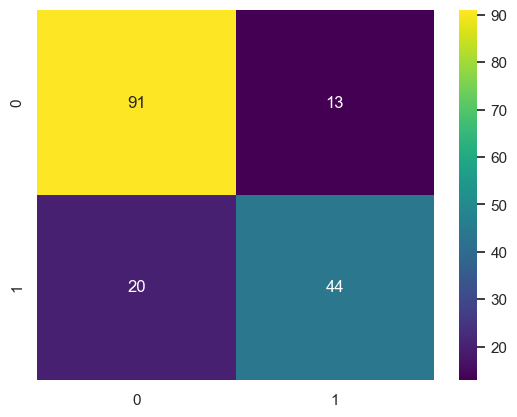

In [112]:
CM_KNN=confusion_matrix(y_test, y_pred_KNN_test)
print(CM_KNN)
sns.heatmap(CM_KNN,annot=True,cmap="viridis")
plt.show()

## **Tuning**

In [ ]:
models = {
    'RandomForest': {
        'estimator': RandomForestClassifier(random_state=42),
        'param_dist': {
            'n_estimators':    [100, 200, 500, 1000],
            'max_depth':       [None, 5, 10, 20, 30],
            'min_samples_split':[2, 5, 10],
            'max_features':    ['auto', 'sqrt', 'log2'],
            'class_weight':    ['balanced', None]
        }
    },
    'SVC': {
        'estimator': SVC(kernel='rbf', probability=True, random_state=42),
        'param_dist': {
            'C':     [0.01, 0.1, 1, 10, 100],
            'gamma': ['scale', 0.001, 0.01, 0.1, 1]
        }
    },
    'XGBoost': {
        'estimator': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'param_dist': {
            'n_estimators':    [100, 200, 500],
            'max_depth':       [3, 5, 7, 10],
            'learning_rate':   [0.01, 0.05, 0.1, 0.2],
            'subsample':       [0.6, 0.8, 1.0],
            'colsample_bytree':[0.6, 0.8, 1.0],
            'reg_lambda':      [0, 1, 5]
        }
    },
    'KNN': {
        'estimator': KNeighborsClassifier(),
        'param_dist': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    }
    
}

results = []

# 2. RandomizedSearchCV loop
for name, info in models.items():
    search = RandomizedSearchCV(
        info['estimator'],
        info['param_dist'],
        cv=3,
        n_iter=10,
        scoring='roc_auc',
        n_jobs=-1
    )
    
    
    
    search.fit(X_train, y_train)
    best = search.best_estimator_
    
    # 3. Evaluate on train & test
    y_train_pred  = best.predict(X_train)
    y_test_pred   = best.predict(X_test)
    y_train_proba = best.predict_proba(X_train)[:, 1]
    y_test_proba  = best.predict_proba(X_test)[:, 1]
    
    results.append({
        'Model':      name,
        'Best Params':search.best_params_,
        'Train Acc':  accuracy_score(y_train, y_train_pred),
        'Test Acc':   accuracy_score(y_test, y_test_pred),
        'Train AUC':  roc_auc_score(y_train, y_train_proba),
        'Test AUC':   roc_auc_score(y_test,  y_test_proba)
    })

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", lin

                                                    Best Params  Train Acc  \
Model                                                                        
RandomForest  {'n_estimators': 200, 'min_samples_split': 10,...   0.908819   
SVC                                {'gamma': 'scale', 'C': 0.1}   0.819133   
XGBoost       {'subsample': 0.6, 'reg_lambda': 1, 'n_estimat...   0.880419   
KNN            {'weights': 'uniform', 'p': 2, 'n_neighbors': 9}   0.837070   

              Test Acc  Train AUC  Test AUC  
Model                                        
RandomForest  0.815476   0.970014  0.868840  
SVC           0.809524   0.878707  0.834886  
XGBoost       0.803571   0.949015  0.861328  
KNN           0.803571   0.909165  0.852389  


## **Compare Results**

In [92]:
results_df = pd.DataFrame(results).set_index('Model')
print(results_df)


                                                    Best Params  Train Acc  \
Model                                                                        
RandomForest  {'n_estimators': 200, 'min_samples_split': 10,...   0.908819   
SVC                                {'gamma': 'scale', 'C': 0.1}   0.819133   
XGBoost       {'subsample': 0.6, 'reg_lambda': 1, 'n_estimat...   0.880419   
KNN            {'weights': 'uniform', 'p': 2, 'n_neighbors': 9}   0.837070   

              Test Acc  Train AUC  Test AUC  
Model                                        
RandomForest  0.815476   0.970014  0.868840  
SVC           0.809524   0.878707  0.834886  
XGBoost       0.803571   0.949015  0.861328  
KNN           0.803571   0.909165  0.852389  


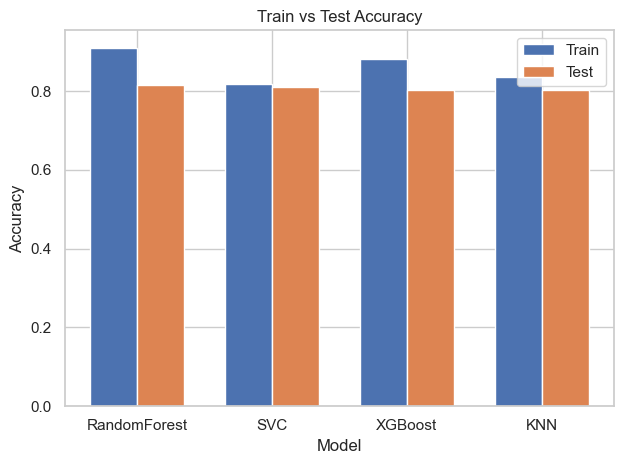

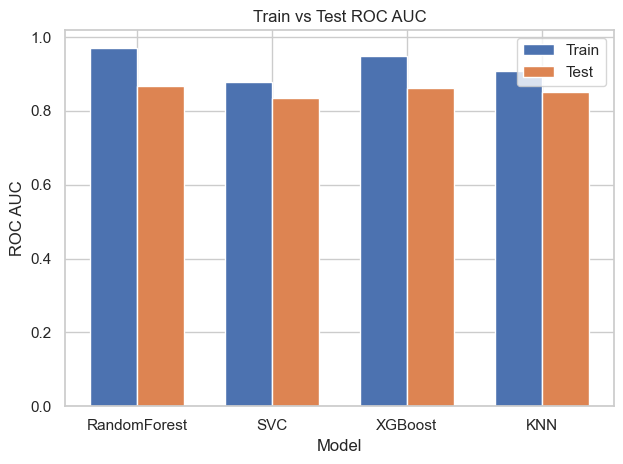

In [93]:
models = results_df.index.tolist()
train_acc = results_df['Train Acc'].values
test_acc  = results_df['Test Acc'].values
train_auc = results_df['Train AUC'].values
test_auc  = results_df['Test AUC'].values

x = np.arange(len(models))
width = 0.35

plt.figure()
plt.bar(x - width/2, train_acc, width, label='Train')
plt.bar(x + width/2, test_acc, width, label='Test')
plt.xticks(x, models)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(x - width/2, train_auc, width, label='Train')
plt.bar(x + width/2, test_auc, width, label='Test')
plt.xticks(x, models)
plt.xlabel('Model')
plt.ylabel('ROC AUC')
plt.title('Train vs Test ROC AUC')
plt.legend()
plt.tight_layout()
plt.show()


In [94]:

# Assume rf_best, svc_best, xgb_best are your tuned estimators:
rf_best  = RandomForestClassifier(**results_df.loc['RandomForest','Best Params'], random_state=42)
svc_best = SVC(**results_df.loc['SVC','Best Params'], kernel='rbf', probability=True, random_state=42)
xgb_best = XGBClassifier(**results_df.loc['XGBoost','Best Params'], use_label_encoder=False, eval_metric='logloss', random_state=42)

# Calibrate (optional but can improve AUC)
rf_cal  = CalibratedClassifierCV(rf_best,  cv=5)
svc_cal = CalibratedClassifierCV(svc_best, cv=5)
xgb_cal = CalibratedClassifierCV(xgb_best, cv=5)

for clf in (rf_cal, svc_cal, xgb_cal):
    clf.fit(X_train, y_train)

ensemble = VotingClassifier(
    estimators=[
        ('rf',  rf_cal),
        ('svc', svc_cal),
        ('xgb', xgb_cal)
    ],
    voting='soft',   # use predict_proba
    weights=[2,1,2]  # weight XGB & RF more heavily
)
ensemble.fit(X_train, y_train)

# Evaluate
y_test_pred = ensemble.predict(X_test)
y_test_proba = ensemble.predict_proba(X_test)[:,1]

print("Ensemble Test Acc:", accuracy_score(y_test, y_test_pred))
print("Ensemble Test AUC:", roc_auc_score(y_test, y_test_proba))


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:14:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:14:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:14:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:14:02] WARNING: C:\actions-r

Ensemble Test Acc: 0.7976190476190477
Ensemble Test AUC: 0.8608774038461537


In [ ]:
for name, clf in [('RF', rf_best), ('SVC', svc_best), ('XGB', xgb_best), ('ENS', ensemble)]:
    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()
    auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc').mean()
    print(f"{name}: CV Acc = {acc:.4f}, CV AUC = {auc:.4f}")


RF: CV Acc = 0.8411, CV AUC = 0.8852
SVC: CV Acc = 0.8052, CV AUC = 0.8585


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:15:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:15:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:15:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:15:16] WARNING: C:\actions-r

XGB: CV Acc = 0.8352, CV AUC = 0.8886


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:15:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:15:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:15:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:15:26] WARNING: C:\actions-r

ENS: CV Acc = 0.8328, CV AUC = 0.8839


## **save Best Model**

In [118]:
joblib.dump(KNN , 'Models/KNN_model.pkl')
joblib.dump(rf_best , 'Models/RandomForest_model.pkl')

['Models/RandomForest_model.pkl']

# **Conclusion**
## 1. **Data Overview and Loading**                                                                             
You start by loading the Titanic dataset, which contains features such as PassengerId, Survived (the target variable), Pclass (passenger class), Name, Sex, Age, SibSp (siblings/spouses aboard), Parch (parents/children aboard), Ticket, Fare, Cabin, and Embarked (port of embarkation).
You preview the data, displaying the first and last few rows, which helps understand the structure and types of data you are working with.

##  2. **Descriptive Statistics and Data Exploration**
You use descriptive statistics to summarize the dataset. For example, you display counts, means, standard deviations, minimums, maximums, and quartiles for numeric features like Age and Fare.
You observe that:
The average survival rate is about 38%.
Ages range from 0.4 to 80 years.
There are significant missing values in the Cabin (77% missing), Age (~20% missing), and Embarked (very few missing) columns.
Fare has some outlier values.

##  3. **Missing Data Analysis**
You analyze missing data, quantifying how many values are missing in each column and what percentage of the dataset this represents. This is crucial for planning how to handle incomplete data during preprocessing.

##  4. **Data Cleaning and Preprocessing**
Although not fully detailed in the provided excerpt, typical steps (inferred from standard practice and supporting sources) include:
Handling missing values (e.g., imputing Age, dropping or encoding Cabin, filling Embarked with the most common value).
Converting categorical variables (like Sex and Embarked) into numerical formats for modeling.
Possibly engineering new features, such as combining SibSp and Parch into a family size feature or extracting titles from names.

##  5. **Model Building and Evaluation**
You experiment with several classification models to predict survival, including RandomForest, SVC (Support Vector Classifier), XGBoost, and KNN.
You compare their performance using metrics such as training accuracy, test accuracy, and AUC (Area Under the ROC Curve).
Your results show RandomForest achieved the highest test accuracy (81.5%), with other models performing slightly lower.

##  6. I**nsights and Conclusions**
The notebook demonstrates the classic Titanic machine learning pipeline: data exploration, preprocessing, model selection, and evaluation.
You highlight the importance of handling missing data and feature engineering to improve model performance.
The results are consistent with common benchmarks for the Titanic dataset, where well-tuned models typically reach around 80–82% accuracy.
Key Information Extracted
Dataset: Titanic passenger manifest with survival labels and demographic information.
Main Goal: Predict whether a passenger survived the Titanic disaster.
Approach: Data exploration, cleaning, feature engineering, and application of multiple classification models.
Model Comparison: RandomForest performed best, followed by SVC, XGBoost, and KNN.
Missing Data: Significant in Cabin and Age columns, minor in Embarked.
Performance Metrics: Test accuracy and AUC used to evaluate and compare models.

#


 ---
<div style="background-color: #111; padding: 15px; font: bold 30px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px ; text-align: center">
  <p style="text-align: center;">Thank you for your time and efforts!</p>
  <h3 style="text-align: center;">By: Youssef Bassiony Abdlah</h3>
  <div style="display: inline-block; text-algeint: center">
    <a  href="youssefbassiony113@gmail.com" title="Redirect to e-mail">
      <img src="https://th.bing.com/th/id/OIP.ZAr9IkpBiDeiq_uYHNaLiQHaHa?pid=ImgDet&w=159&h=159&c=7"  alt="e-mail" style="width: 50px; height: 50px; margin: 0 10px; ">
    </a>
    <a href="https://wa.me/+201001725166/" title="Redirect to What'sApp">
      <img src="https://img.icons8.com/?size=160&id=A1JUR9NRH7sC&format=png" alt="What'sApp" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
    <a href="https://www.linkedin.com/in/youssef-bassiony/" title="Redirect to LinkedIn">
      <img src="https://th.bing.com/th/id/OIP.STd9gr0ispBJqJ724-KP4wAAAA?pid=ImgDet&w=96&h=96&c=7" alt="LinkedIn" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
  </div>
</div>
